In [1]:
import sys
sys.path.insert(1, '../../Pipeline')

import imp
import utils
imp.reload(utils)
from utils import *

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

try:
    from jupyterthemes import jtplot
    jtplot.style()
except:
    pass

ip = pd.read_csv('../../../data/cleandata/Info pluviometricas/Merged Data/merged.csv',
                 sep = ';',
                 dtype = {'Local_0': object, 'Local_1':object,
                          'Local_2':object,  'Local_3':object})

print(ip.columns)
ip.head()

Index(['Data', 'Hora', 'Data / Hora', 'UmidadeRelativa_0',
       'PressaoAtmosferica_0', 'Temperatura do Ar_0', 'TemperaturaInterna_0',
       'PontoDeOrvalho_0', 'SensacaoTermica_0', 'RadiacaoSolar_0',
       'DirecaoDoVento_0', 'VelocidadeDoVento_0', 'Precipitacao_0', 'Local_0',
       'UmidadeRelativa_1', 'PressaoAtmosferica_1', 'Temperatura do Ar_1',
       'TemperaturaInterna_1', 'PontoDeOrvalho_1', 'SensacaoTermica_1',
       'RadiacaoSolar_1', 'DirecaoDoVento_1', 'VelocidadeDoVento_1',
       'Precipitacao_1', 'Local_1', 'UmidadeRelativa_2',
       'PressaoAtmosferica_2', 'Temperatura do Ar_2', 'TemperaturaInterna_2',
       'PontoDeOrvalho_2', 'SensacaoTermica_2', 'RadiacaoSolar_2',
       'DirecaoDoVento_2', 'VelocidadeDoVento_2', 'Precipitacao_2', 'Local_2',
       'UmidadeRelativa_3', 'PressaoAtmosferica_3', 'Temperatura do Ar_3',
       'TemperaturaInterna_3', 'PontoDeOrvalho_3', 'SensacaoTermica_3',
       'RadiacaoSolar_3', 'DirecaoDoVento_3', 'VelocidadeDoVento_3',
    

,Data,Hora,Data / Hora,UmidadeRelativa_0,PressaoAtmosferica_0,Temperatura do Ar_0,TemperaturaInterna_0,PontoDeOrvalho_0,SensacaoTermica_0,RadiacaoSolar_0,...,PressaoAtmosferica_4,Temperatura do Ar_4,TemperaturaInterna_4,PontoDeOrvalho_4,SensacaoTermica_4,RadiacaoSolar_4,DirecaoDoVento_4,VelocidadeDoVento_4,Precipitacao_4,Local_4
0,31/12/11,23:46:34,31/12/11 23:46:34,94.2,916.9,18.9,22.5,17.9,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,31/12/11,23:30:32,31/12/11 23:30:32,94.3,917.0,18.8,22.4,17.9,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,31/12/11,23:16:32,31/12/11 23:16:32,94.2,917.0,18.8,22.4,17.8,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,31/12/11,23:00:32,31/12/11 23:00:32,94.2,917.1,18.7,22.4,17.8,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,31/12/11,22:46:32,31/12/11 22:46:32,94.2,917.1,18.8,22.5,17.9,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
"""
UmidadeRelativa
PressaoAtmosferica
Temperatura do Ar
TemperaturaInterna
PontoDeOrvalho
SensacaoTermica
RadiacaoSolar
DirecaoDoVento
Precipitacao
""";

In [ ]:
"""VelocidadeDoVento"""

#### Umidade Relativa 

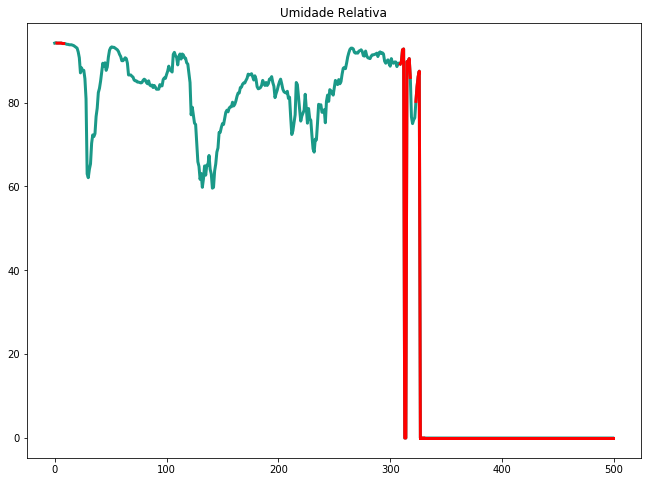

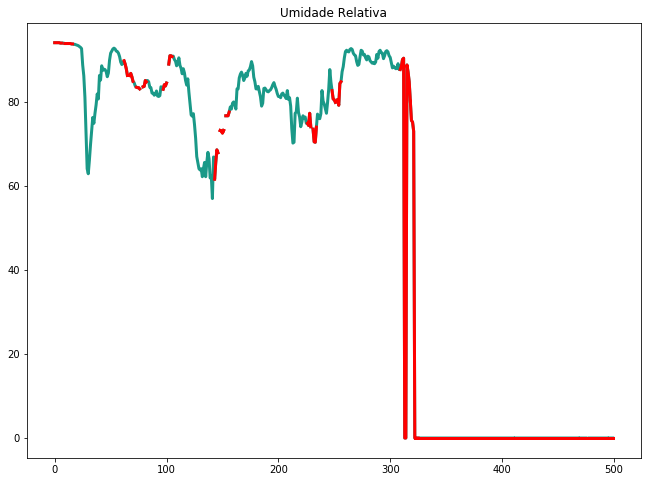

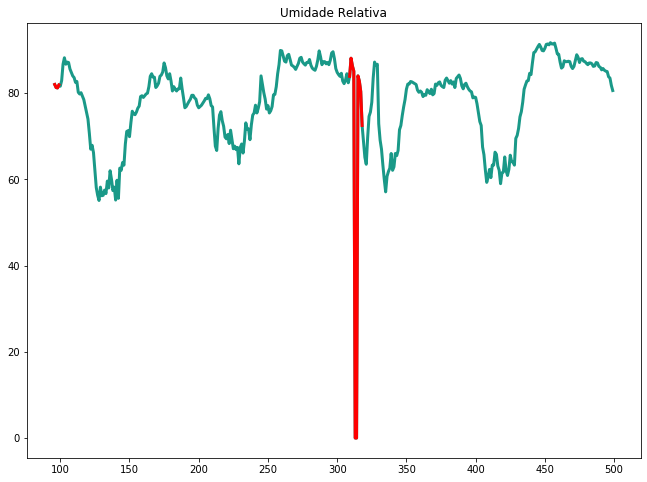

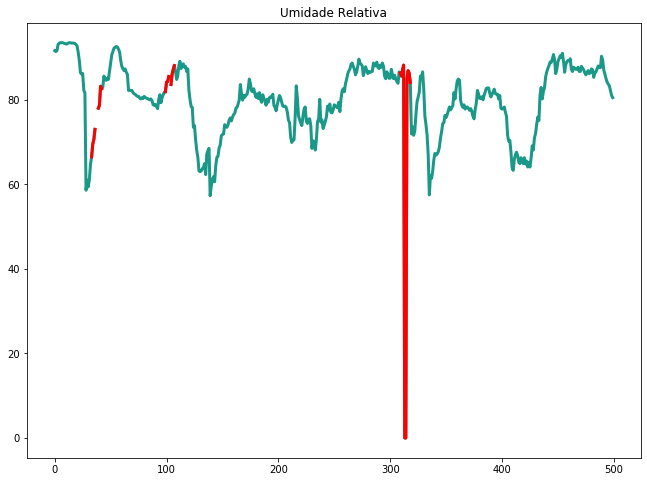

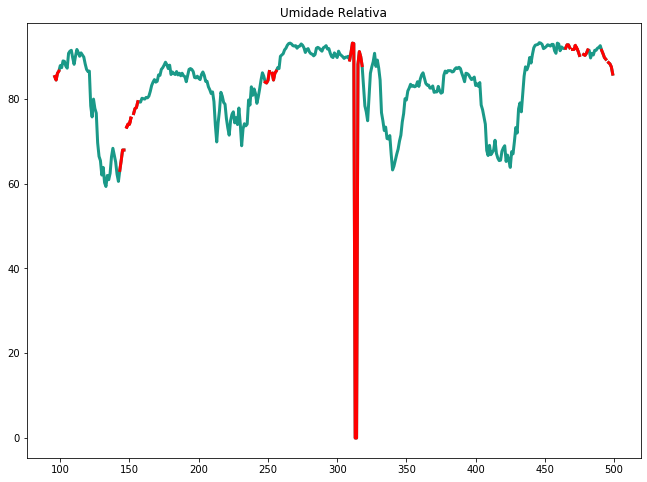

In [3]:
cols_um = [i for i in ip.columns if 'UmidadeRelativa' in i]
um = ip[cols_um].fillna(np.nan)
start, stop = 0, 500
for col in um.columns:
    peaks = derivative_threshold(um[col], 12, False, start, stop, lw = 2, figsize = (11, 15))
    zeros = derivative_zero(um[col], 3, False, False, start, stop, lw = 2, figsize = (11, 15))
    nans = um[col].isna()
    error = [zeros[i] or peaks[i] or nans[i] for i in range(len(peaks))]
    error_reg = list_2_regions(error)
    error_reg = increase_margins(3, error_reg, len(peaks))
    error = regions_2_list(error_reg, len(peaks))
    plot_regions(um[col], error_reg, start, stop, plt_type = 'lines', 
                 title = 'Umidade Relativa', figsize = (11, 8), lw = 3)

#### PressaoAtmosferica

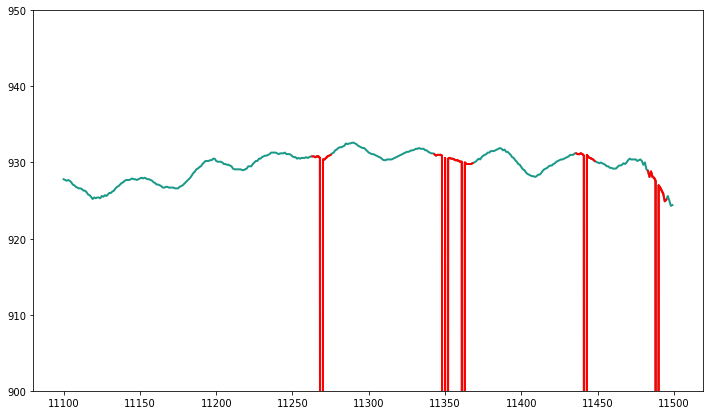

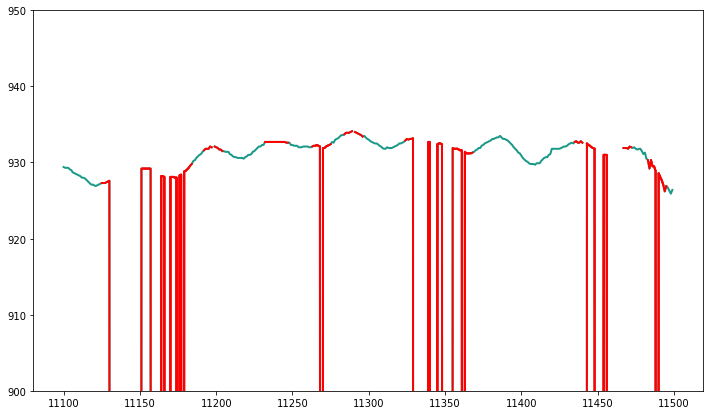

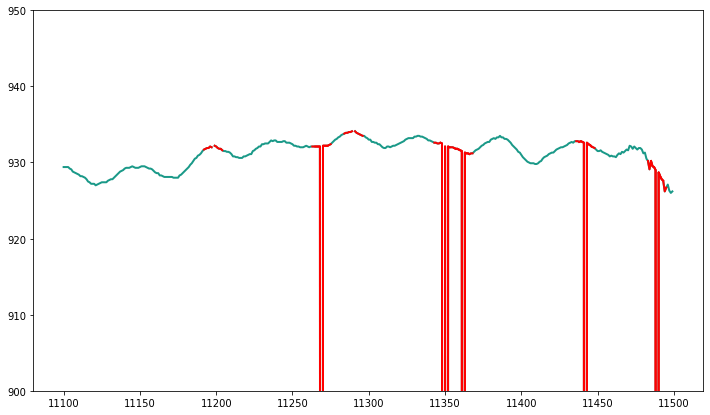

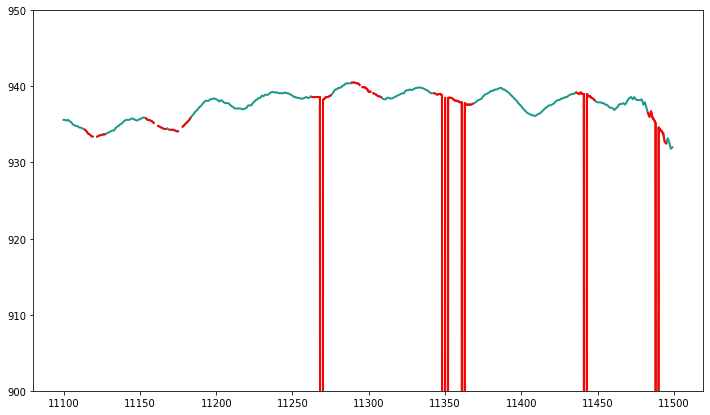

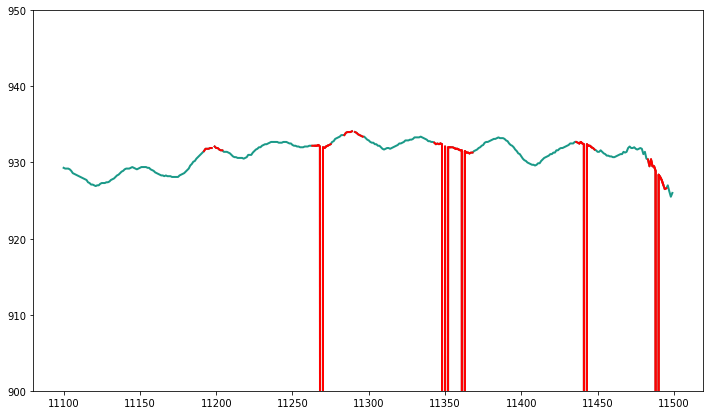

In [4]:
cols_um = [i for i in ip.columns if 'PressaoAtmosferica' in i]
um = ip[cols_um].fillna(np.nan)
um.head()

for col in um.columns:
    peaks = derivative_threshold(um[col], 50, False, 1000, 1500, ylim = [900, 1000])
    zeros = derivative_zero(um[col], 7, False, False, 1000, 1500, ylim = [900, 1000])
    nans = um[col].isna()
    error = [zeros[i] or peaks[i] or nans[i] for i in range(len(peaks))]
    error_reg = list_2_regions(error)
    error_reg = increase_margins(5, error_reg, len(peaks))
    plot_regions(um[col], error_reg, 11100, 11500, plt_type = 'lines', ylim=[900, 950])

#### Temperatura do Ar

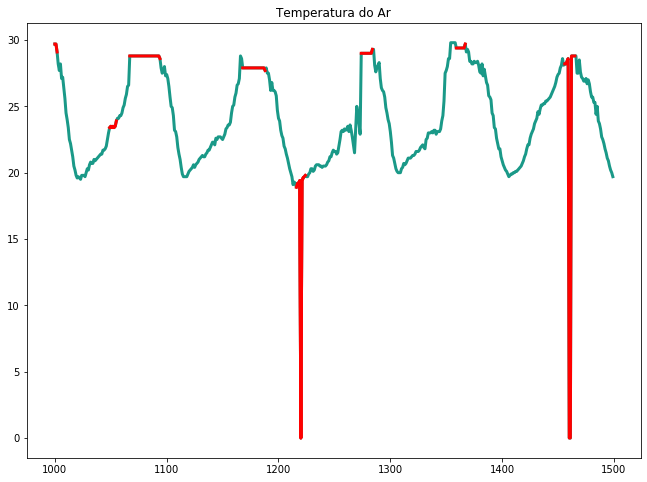

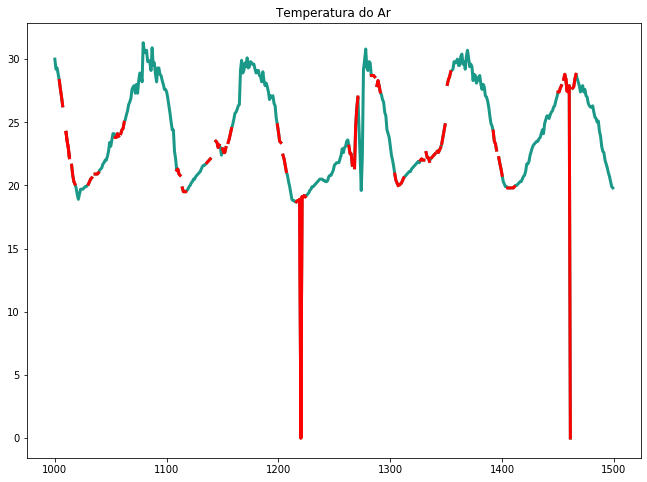

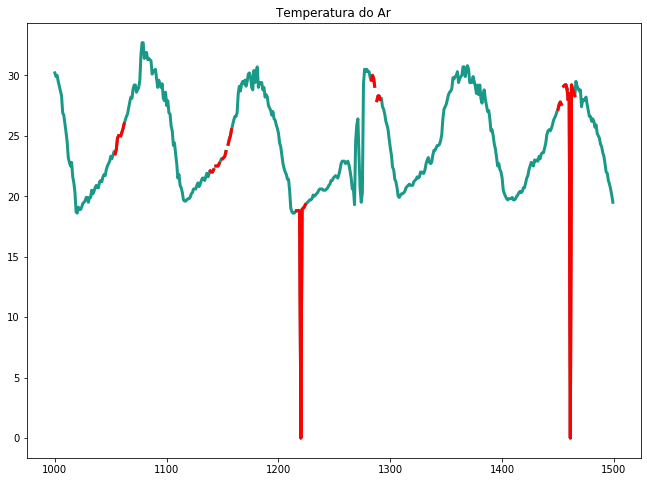

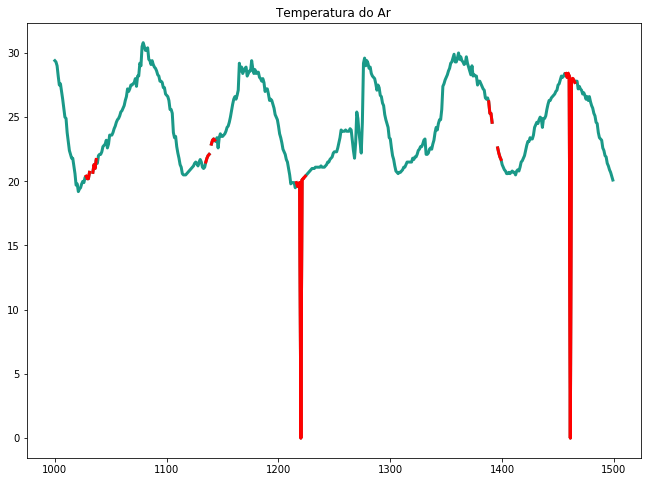

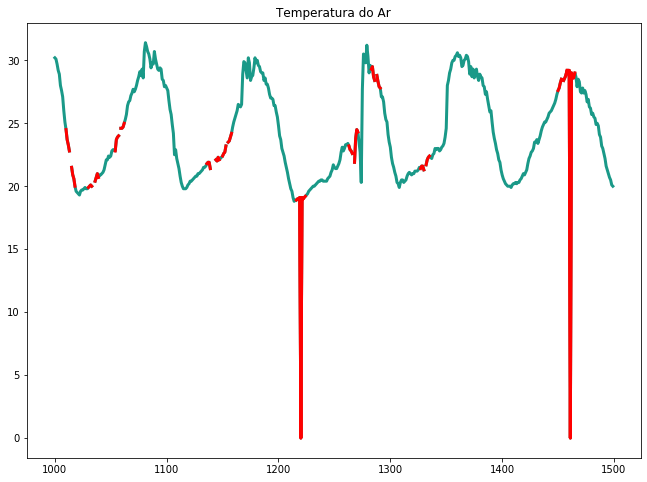

In [5]:
cols_um = [i for i in ip.columns if 'Temperatura do Ar' in i]
um = ip[cols_um].fillna(np.nan)
um.head()

for col in um.columns:
    peaks = derivative_threshold(um[col], 6, False, 4000, 4500)
    zeros = derivative_zero(um[col], 4,False, False, 1000, 1500)
    nans = um[col].isna()
    error = [zeros[i] or peaks[i] or nans[i] for i in range(len(peaks))]
    error_reg = list_2_regions(error)
    error_reg = increase_margins(3, error_reg, len(peaks))
    plot_regions(um[col], error_reg, 1000, 1500, plt_type = 'lines',
                 title = 'Temperatura do Ar', figsize = (11, 8), lw = 3)

#### TemperaturaInterna

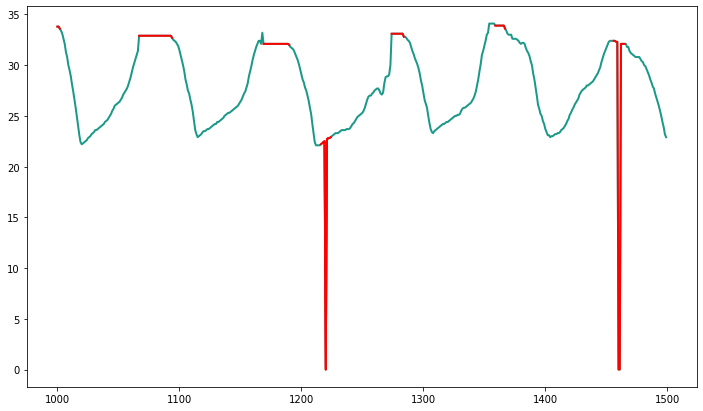

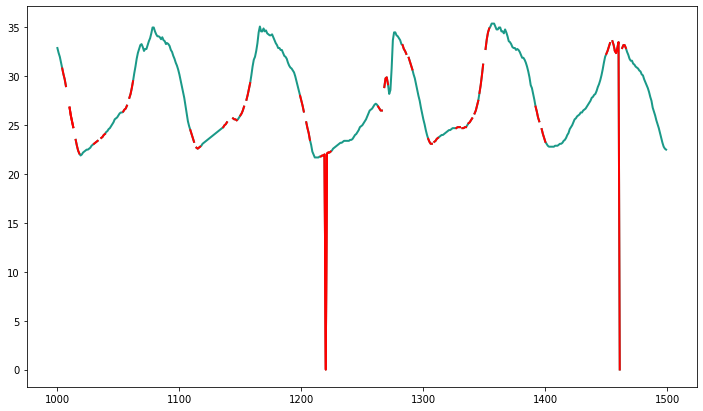

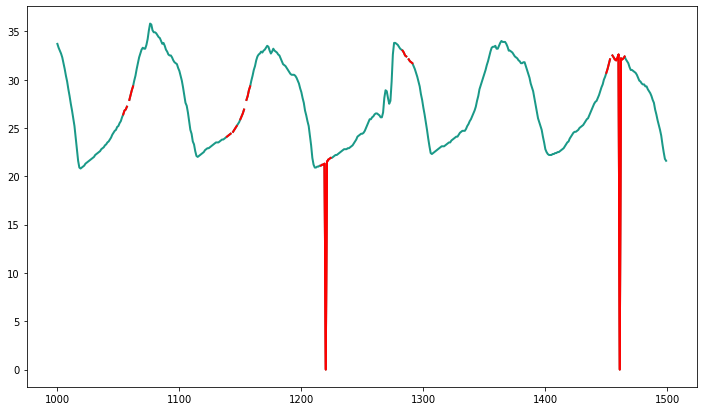

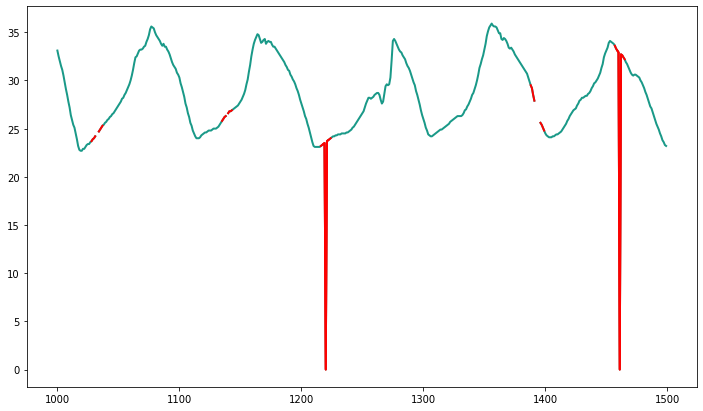

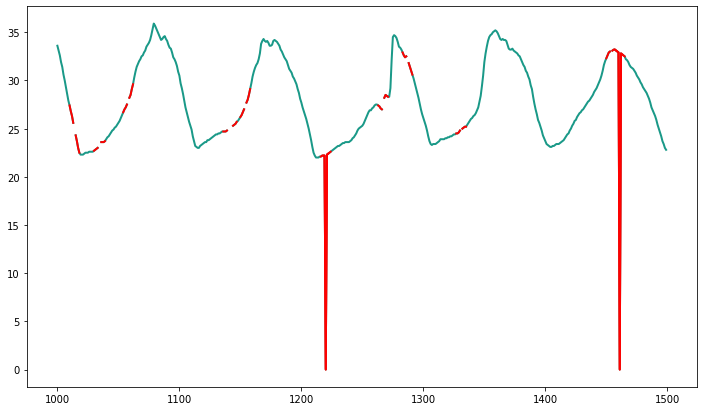

In [6]:
cols_um = [i for i in ip.columns if 'TemperaturaInterna' in i]
um = ip[cols_um].fillna(np.nan)
um.head()

for col in um.columns:
    peaks = derivative_threshold(um[col], 6, False, 4000, 4500)
    zeros = derivative_zero(um[col], 4, False, False, 1000, 1500)
    nans = um[col].isna()
    error = [zeros[i] or peaks[i] or nans[i] for i in range(len(peaks))]
    error_reg = list_2_regions(error)
    error_reg = increase_margins(3, error_reg, len(peaks))
    plot_regions(um[col], error_reg, 1000, 1500, plt_type = 'lines')

#### PontoDeOrvalho

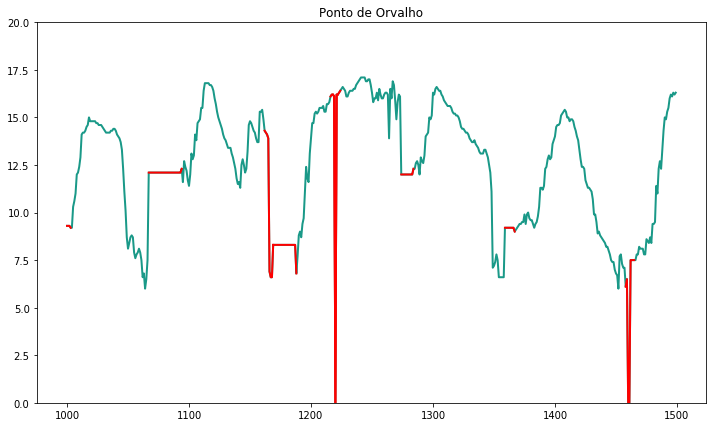

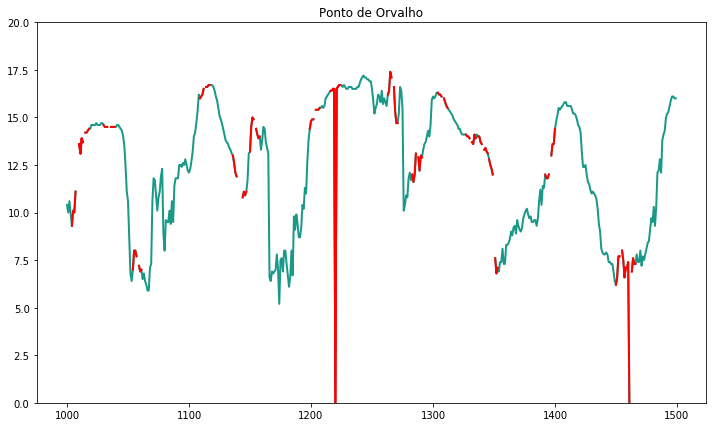

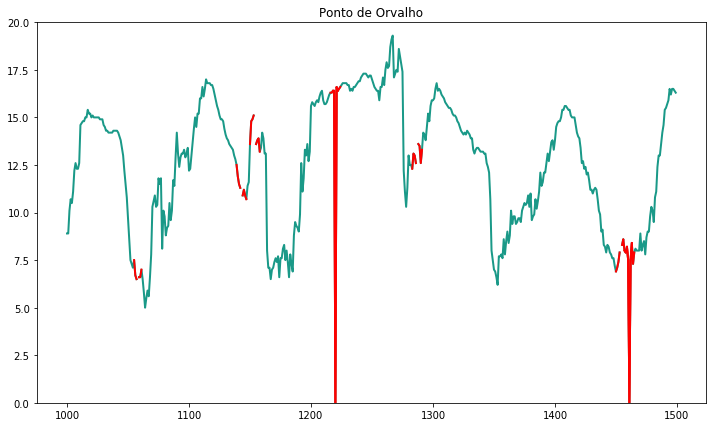

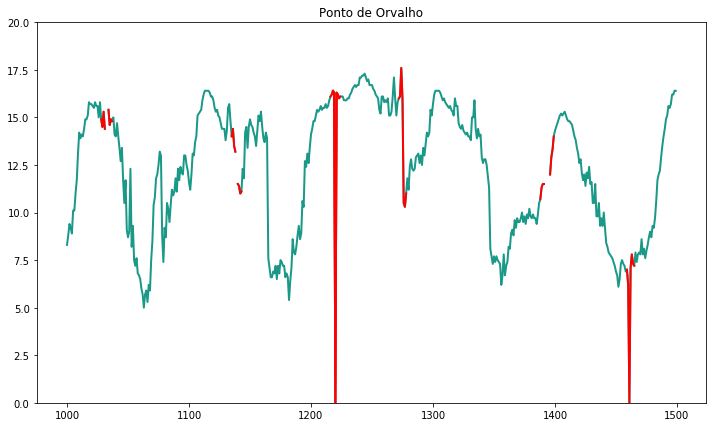

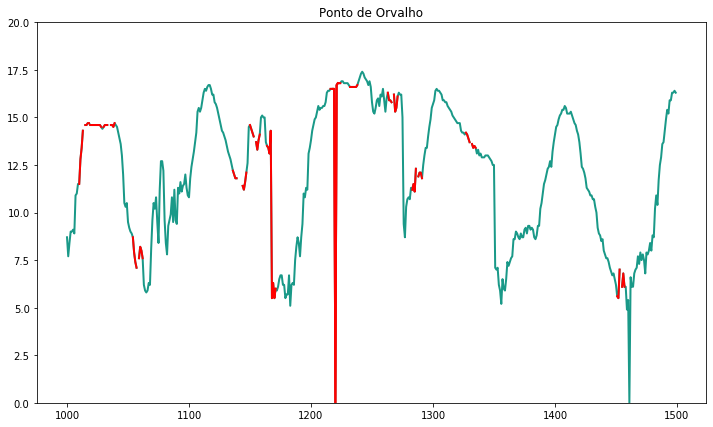

In [7]:
cols_um = [i for i in ip.columns if 'PontoDeOrvalho' in i]
um = ip[cols_um].fillna(np.nan)
um.head()

for col in um.columns:
    peaks = derivative_threshold(um[col], 3.5, False, 4000, 4500)
    zeros = derivative_zero(um[col], 4, False, False, 1000, 1500)
    nans = um[col].isna()
    error = [zeros[i] or peaks[i] or nans[i] for i in range(len(peaks))]
    error_reg = list_2_regions(error)
    error_reg = increase_margins(3, error_reg, len(peaks))
    plot_regions(um[col], error_reg, 1000, 1500, plt_type = 'lines', ylim=[0, 20], title = 'Ponto de Orvalho')

#### SensacaoTermica

TypeError: '<' not supported between instances of 'int' and 'NoneType'

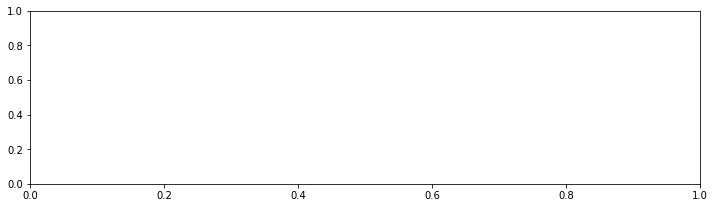

In [8]:
cols_um = [i for i in ip.columns if 'SensacaoTermica' in i]
um = ip[cols_um].fillna(np.nan)
um.head()
start, stop = 10000, 14500
for col in um.columns:
    peaks = derivative_threshold(um[col].fillna(0), 4, False, start, stop)
    zeros = derivative_zero(um[col].fillna(0), 10, False, start, stop)
    nans = um[col].isna()
    error = [zeros[i] or peaks[i] or nans[i] for i in range(len(peaks))]
    error_reg = list_2_regions(error)
    error_reg = increase_margins(3, error_reg, len(peaks))
    plot_regions(um[col].fillna(0), error_reg, start, stop, plt_type = 'lines')

#### RadiacaoSolar

In [ ]:
cols_um = [i for i in ip.columns if 'RadiacaoSolar' in i]
um = ip[cols_um].fillna(np.nan)
um.head()
start, stop = 0, 3500 
for col in um.columns:
    peaks = derivative_threshold(um[col].fillna(0), 750, False, start, stop)
    zeros = derivative_zero(um[col].fillna(0), 60, False, plot = False, plt_start = start, plt_stop = stop)
    const_not_null = derivative_zero(um[col].fillna(0), 3, True, False, start, stop)
    nans = um[col].isna()
    error = [zeros[i] or nans[i] or const_not_null[i] or peaks[i] for i in range(len(zeros))]
    error_reg = list_2_regions(error)
    error_reg = increase_margins(5, error_reg, len(zeros))
    plot_regions(um[col].fillna(0), error_reg, start, stop, plt_type = 'lines')

#### DirecaoDoVento

In [ ]:
cols_um = [i for i in ip.columns if 'DirecaoDoVento' in i]
um = ip[cols_um]
um.head()
start, stop = 0, 0 + 500
for col in um.columns[:-1]:
    #peaks = derivative_threshold(um[col].fillna(0), 120, True, start, stop)
    zeros = derivative_zero(um[col].fillna(0), 3, False, start, stop)
    nans = um[col].isna()
    error = [zeros[i] or nans[i] for i in range(len(zeros))]
    error_reg = list_2_regions(error)
    error_reg = increase_margins(3, error_reg, len(zeros))
    plot_regions(um[col], error_reg, start, stop, plt_type = 'lines')

#### Velocidade do Vento

In [ ]:
cols_um = [i for i in ip.columns if 'VelocidadeDoVento' in i]
um = ip[cols_um].fillna(np.nan)
um.head()
start, stop = 0, 1000
for col in um.columns:
    peaks = derivative_threshold(um[col], 8, False, start, stop)
    zeros = derivative_zero(um[col].fillna(0), 5, False, start, stop)
    nans = um[col].isna()
    error = [zeros[i] or peaks[i] or nans[i] for i in range(len(peaks))]
    error_reg = list_2_regions(error)
    error_reg = increase_margins(3, error_reg, len(peaks))
    plot_regions(um[col].fillna(0), error_reg, start, stop, plt_type = 'lines')

#### Precipitacao

In [ ]:
cols_um = [i for i in ip.columns if 'Precipitacao' in i]
um = ip[cols_um].fillna(np.nan)
um.head()
start, stop = 15000, 20000
max_ = 0
for col in um.columns[:-1]:
    print(um[col].nlargest(5))

    #zeros = derivative_zero(um[col].fillna(0), 10, False, start, stop)
    #nans = um[col].isna()
    #error = [zeros[i] or peaks[i] or nans[i] for i in range(len(peaks))]
    #error_reg = list_2_regions(error)
    #error_reg = increase_margins(3, error_reg, len(peaks))
    #plot_regions(um[col].fillna(0), error_reg, len(um[col]), start, stop, plt_type = 'lines')